In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

inspector = inspect(engine)
print(inspector.get_table_names())

['measurement', 'station']


In [6]:
columns = inspector.get_columns("measurement")
for c in columns:
    print(c["name"], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [7]:
query = """
        SELECT
        *
        FROM measurement
        limit 50
        """

In [8]:
conn = engine.connect()
df = pd.read_sql(query, con=conn)

In [9]:
df.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [10]:
columns = inspector.get_columns("station")
for c in columns:
    print(c["name"], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
query = """
        SELECT
        *
        FROM station
        limit 50
        """

In [12]:
conn = engine.connect()
df = pd.read_sql(query, con=conn)
conn.close()

In [13]:
df.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [14]:
query = """
        SELECT
            date,
            prcp
        FROM
            measurement
        
        ORDER BY
            date
        """

In [15]:
conn = engine.connect()
df = pd.read_sql(query, con=conn)
conn.close()

In [16]:
df["date"] = pd.to_datetime(df["date"])
max_date = df.loc[len(df) - 1, "date"]
start_date = max_date - dt.timedelta(days=365)

df_sub = df.loc[df["date"] >= start_date].reset_index(drop=True)
df_sub.head()
                                                    

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02


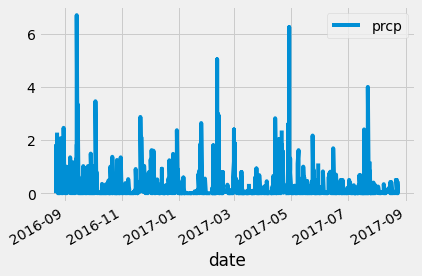

In [17]:
df_sub.set_index("date").plot()

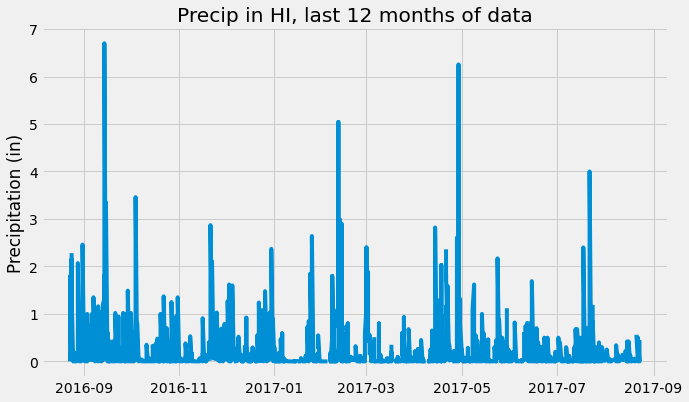

In [18]:
plt.figure(figsize=(10,6))
plt.plot(df_sub.date, df_sub.prcp)
plt.title("Precip in HI, last 12 months of data")
plt.ylabel("Precipitation (in)")
plt.xlabel("")
plt.show()

In [19]:
df_sub.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [20]:
# reflect an existing database into a new model

# reflect the tables

In [21]:
# We can view all of the classes that automap found


In [22]:
# Save references to each table


In [23]:
# Create our session (link) from Python to the DB


# Exploratory Climate Analysis

In [24]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [25]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [31]:
# Design a query to show how many stations are available in this dataset?
query = """
        SELECT
            count(*) as station_count
        FROM
            station
        """


In [32]:
conn = engine.connect()
df = pd.read_sql(query, con=conn)
conn.close()

df

,station_count
0,9


In [33]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
query = """
        SELECT
        s.station,
        count(*) as tot_obs
        FROM
            station s
        JOIN measurement m on s.station = m.station
        GROUP BY s.station
        ORDER BY
            count(*) desc
        """

In [34]:
conn = engine.connect()
df = pd.read_sql(query, con=conn)
conn.close()

df

,station,tot_obs
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [35]:
query = """
        SELECT
            m.date,
            m.prcp,
            m.tobs,
            s.station,
            s.name
        FROM
            measurement m
            join station s on m.station = s.station
        WHERE
            date >= (
                        SELECT
                           date(MAX(date), '-365 day')
                        FROM
                            measurement
                    )
        ORDER BY
            date
        """

In [36]:
conn = engine.connect()
df = pd.read_sql(query, con=conn)
conn.close()

df

,date,prcp,tobs,station,name
0,2016-08-23,0.00,81.0,USC00519397,"WAIKIKI 717.2, HI US"
1,2016-08-23,0.15,76.0,USC00513117,"KANEOHE 838.1, HI US"
2,2016-08-23,0.05,80.0,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US"
3,2016-08-23,NaN,80.0,USC00517948,"PEARL CITY, HI US"
4,2016-08-23,0.02,80.0,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US"
...,...,...,...,...,...
2225,2017-08-22,0.50,76.0,USC00516128,"MANOA LYON ARBO 785.2, HI US"
2226,2017-08-23,0.00,81.0,USC00519397,"WAIKIKI 717.2, HI US"
2227,2017-08-23,0.00,82.0,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US"
2228,2017-08-23,0.08,82.0,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US"


In [41]:
 df.groupby("station").size().sort_values(ascending=False)

station
USC00519397    361
USC00519281    352
USC00516128    349
USC00513117    343
USC00519523    337
USC00514830    305
USC00517948    183
dtype: int64

In [42]:
most_active = df.groupby("station").size().sort_values(ascending=False).index[0]
most_active

'USC00519397'

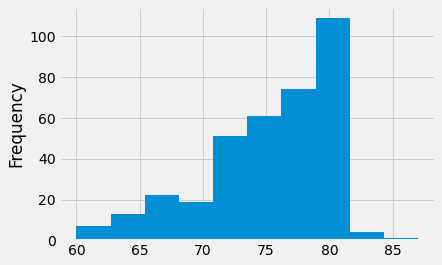

In [43]:
df.loc[df.station == most_active, "tobs"].reset_index(drop=True).plot(kind="hist")

In [44]:
df_sub = df.loc[df.station == most_active].reset_index(drop=True)

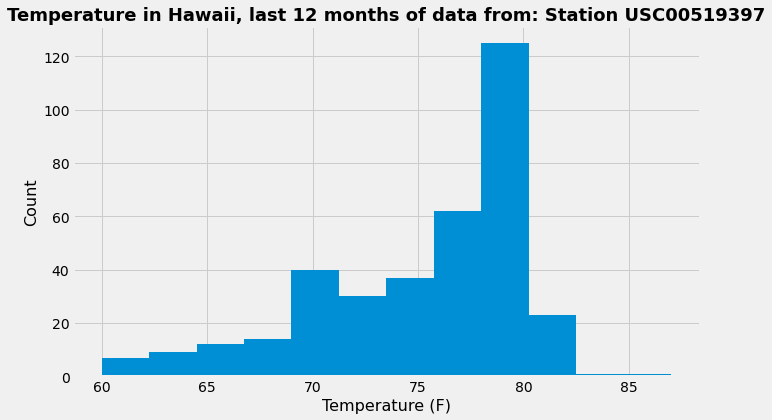

In [45]:
plt.figure(figsize=(10,6))
plt.hist(df_sub.tobs, bins=12)
plt.title(f"Temperature in Hawaii, last 12 months of data from: Station {mostActive}", fontweight="bold", fontsize=18)
plt.ylabel("Count", fontsize=16)
plt.xlabel("Temperature (F)", fontsize=16)

plt.show()